In [1]:
# switch to main dir to fix imports
import os

if os.getcwd().endswith("notebooks"):
    os.chdir("..")
    print("using project root as working dir")

using project root as working dir


In [87]:
import seaborn as sns
import torch
import graphviz
import random

In [3]:
# start autoreload
%load_ext autoreload
%autoreload 2

# select device
device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
print(f"using {device} device")

# global seaborn settings
sns.set_context("paper")
sns.set_style("darkgrid", {"grid.color": ".8"})
palette = "Dark2"

using cuda device


# Visualize network with graphviz

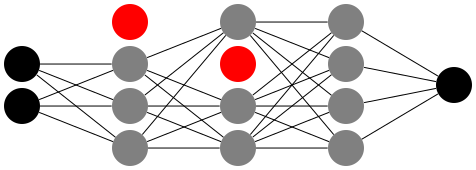

In [104]:
layers = [2, 4, 4, 4, 1]
layer_colors = ["black", "gray", "gray", "gray", "black"]

dot = graphviz.Graph(
    'Model',
    graph_attr={
        'fontname': 'Hilda 10',
        'rankdir': 'LR',
        'splines': 'line',
        'nodesep': '.08',
        'ranksep': '1',
    },
    node_attr={
        'fixedsize': 'true',
        'label': "",
        'style': 'filled',
        "color": 'none',
        'fillcolor': 'gray',
        'shape': 'circle',
    },
    edge_attr={
        'color': 'black',
        'arrowsize': '.5',
        'arrowhead': 'vee',
    }
)

dropout_p = 0.2
dropouts = []

# layers
for l, ls in enumerate(layers):
    layer = graphviz.Graph(
        f"layer_{l}",
        node_attr={
            'fillcolor': layer_colors[l],
            'shape': 'circle',
        },
    )
    for n in range(ls):
        if 0 < l < len(layers) - 1 and random.random() < dropout_p:
            dropouts.append((l, n))
            layer.node(f"l{l}_n{n}", fillcolor="red")
        else:
            layer.node(f"l{l}_n{n}")
    dot.subgraph(layer)

# connect layers
for l in range(1, len(layers)):
    for n in range(layers[l-1]):
        for m in range(layers[l]):
            dropped = (l-1, n) in dropouts or (l, m) in dropouts
            dot.edge(f"l{l-1}_n{n}", f"l{l}_n{m}", color=("none" if dropped else "black"))

dot

In [105]:
dot.render("./out/network_graph")

'out/network_graph.pdf'